*Question 1:* Let $P(X) = \dfrac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}$ be the logistic function. Show that the **log-odds** or the **logit** which is defined as $\log \left(\dfrac{p(x)}{1 - p(x)} \right) = \beta_0 + \beta_1 x$, i.e, the logit is linear in $\beta$'s.

*Question 2:* Consider a training data $\{y_i\}_{i=1}^n$ consisting of a categorical response $y \in \{0,1\}$. Note that the training data contains no predictors. Show that in this case, the intercept parameter in logistic regression is $\beta_0 = \log \left( \dfrac{\bar{y}}{1-\bar{y}} \right)$. Interpret this in terms of making a prediction for a new data point?

*Question 3:* This question involves the use of multiple logistic regression on Default data set. You can ignore the student status variable and focus the analysis on income and balance.

1. Use `ggplot()` to produce Box plots for each covariate. Generate a scatter plot of covariates. Interpret the figures. 
1. Use the `glm()` function to perform a multiple logistic regression with default as the binary response variable. Use the  `summary()` command to print the results. Comment on your findings. 
1. Use the `predict()` function to perform a prediction on the same training data points. Tabulate the number of correct and incorrect predictions.


*Question 1:* Show that $\log \left(\dfrac{p(x)}{1 - p(x)} \right) = \beta_0 + \beta_1 x$.

1. $\mathrm{logit}(p(x) = \log{\frac{p(x)}{1-p(x)}}$
1. $p(x) = \frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}$
1. $\mathrm{logit}(p(x)) = \log{\left(\frac{\frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}}{\frac{1+ e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}- \frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}}\right)} = \log{(e^{\beta_0 + \beta_1 x})}$
1. $\mathrm{logit}(p(x)) = \beta_0 + \beta_1 x$ Q.E.D.

*Question 2:* Show that $\beta_0 = \log \left( \dfrac{\bar{y}}{1-\bar{y}} \right)$.

1. With no predictors, $\beta_0$ is the only parameter, so $p(x) = \frac{e^{\beta_0}}{1 + e^{\beta_0}}$.
1. $\bar{y} = p_1 1 + p_0 0 = p \times 1 + (1-p)\times 0 = p \therefore \bar{y} = p$
1. $1 + e^{-\beta_0} = \frac{1}{\bar{y}} \therefore \frac{1-\bar{y}}{\bar{y}} = e^{-\beta_0} \therefore e^{\beta_0} = \frac{\bar{y}}{1-\bar{y}} \therefore \beta_0 = \log{\frac{\bar{y}}{1-\bar{y}}}$ Q.E.D.
1. $\beta_0$ represents the log odds of the event $y=1$ because $\bar{y} = p$. The model uses $\beta_0$ without additional parameters due to lack of predictors $x_i$. The odds of $y=1$ is as observed in the training data $\{y_i\}_{i=1}^n$.

     default student      balance        income
0         No      No   729.526495  44361.625074
1         No     Yes   817.180407  12106.134700
2         No      No  1073.549164  31767.138947
3         No      No   529.250605  35704.493935
4         No      No   785.655883  38463.495879
...      ...     ...          ...           ...
9995      No      No   711.555020  52992.378914
9996      No      No   757.962918  19660.721768
9997      No      No   845.411989  58636.156984
9998      No      No  1569.009053  36669.112365
9999      No     Yes   200.922183  16862.952321

[10000 rows x 4 columns]


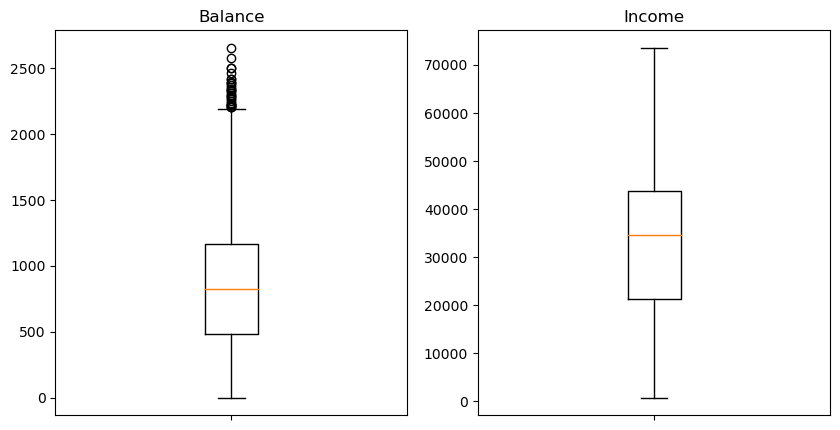

     default student      balance        income
0         No      No   729.526495  44361.625074
1         No     Yes   817.180407  12106.134700
2         No      No  1073.549164  31767.138947
3         No      No   529.250605  35704.493935
4         No      No   785.655883  38463.495879
...      ...     ...          ...           ...
9995      No      No   711.555020  52992.378914
9996      No      No   757.962918  19660.721768
9997      No      No   845.411989  58636.156984
9998      No      No  1569.009053  36669.112365
9999      No     Yes   200.922183  16862.952321

[10000 rows x 4 columns]
Balance mean:  835.3748856125571
Income mean:  33516.981875960504


In [1]:
#Question 3
#This question involves the use of multiple logistic regression on Default data set
#3.1: Use `ggplot()` to produce Box plots for each covariate. Generate a scatter plot of covariates. Interpret the figures.
#The python equivalent of `ggplot()` is matplotlib
from ISLP import load_data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Default = load_data('Default') #ISLP loads data as a pd dataframe
print(Default)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].boxplot(Default['balance'])
axs[0].set_title('Balance')
axs[0].set_xticklabels([''])


axs[1].boxplot(Default['income'])
axs[1].set_title('Income')
axs[1].set_xticklabels([''])

plt.show()

print(Default)
print('Balance mean: ', Default['balance'].mean())
print('Income mean: ', Default['income'].mean())

*Question 3.1:* There are many high outliers in the "Balance" column, making it a right-skewed distribution. There are far fewer outliers in the "Income" column, making it more normally distribution. The mean balance for the students is $\$835.37$, and the mean income for the students is $\$33,516.98$.

In [2]:
#3.2 Use the `glm()` function to perform a multiple logistic regression with 
#default as the binary response variable. Use the  `summary()` command to print the results.
#Comment on your findings.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from ISLP.models import (ModelSpec as MS, summarize)
import statsmodels.api as sm

Default['student'] = (Default['student'] == 'Yes').astype(int)
allvars = Default.columns.drop(['default'])
design = MS(allvars)
X = design.fit_transform(Default)
y = Default.default == 'Yes'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()

summarize(results)

,coef,std err,z,P>|z|
intercept,-10.869000,0.492000,-22.079,0.000
student,-0.646800,0.236000,-2.738,0.006
balance,0.005700,0.000000,24.737,0.000
income,0.000003,0.000008,0.370,0.712


In [3]:
y_pred = results.predict(X_test)

threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

print("Confusion Matrix:")
cmatrix = confusion_matrix(y_test, y_pred_binary)
print(cmatrix)

TN = cmatrix[0, 0] #these coordinates were retrieved from help(confusion_matrix)
FP = cmatrix[0, 1]
FN = cmatrix[1, 0]
TP = cmatrix[1, 1]

acc = (TP + TN) / (TP + TN + FP + FN)
prec = TP / (TP + FP)
spec = TN / (TN + FP)
FPR = FP / (TN + FP)

print('Accuracy: ', acc)
print('Precision: ', prec)
print('Specificity: ', spec)
print('False positive rate: ', FPR)

print(pd.DataFrame({'Correct predictions': [TP + TN], 'Incorrect predictions': [FN + FP]}))

Confusion Matrix:
[[1921   10]
 [  50   19]]
Accuracy:  0.97
Precision:  0.6551724137931034
Specificity:  0.9948213360952874
False positive rate:  0.005178663904712584
   Correct predictions  Incorrect predictions
0                 1940                     60


*Question 3* Comment on your findings: The high specificity along with a low false positive rate and middling precision is consistent with how customers default on their credit card debt infrequently (at a low rate). The model has a high accuracy, and almost nobody defaults. There are more false negatives than false positives because there are many more people who do not default, causing the model to lean towards predicting that there is no default. Increased balance means more likely to default on debt, and student status means less likely to default on debt. All the predictors are statistically significant with near-zero p-values except for income at p = 0.712, indicating that income is not a useful predictor for determining the status of credit card default. With 1940 correct predictions and 60 incorrect predictions giving a 0.97 accuracy rate, we can expect this model to perform well in its predictions.